# Modelo Definitivo

In [19]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd
import statsmodels.api as sm

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt

# Preprocesado y modelado
# ==============================================================================
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
from sklearn.utils.class_weight import compute_class_weight
import multiprocessing


# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')

with open('Datos_finales.csv') as f:
    df = pd.read_csv(f, delimiter=',')

X=df.drop(columns=["CLIMA_AMBIENTAL","CODIGO","ORDEN","LATITUD","LONGITUD","PAISAJE","TIPO_RELIEVE","FORMA_TERRENO","MATERIAL_PARENTAL_LITOLOGIA"])
cat_cols = X.select_dtypes(include=['object', 'category','bool']).columns.to_list()
cont_cols = numeric_cols = df.select_dtypes(include=['float64', 'int']).columns.to_list()
df["ORDEN"] = df["ORDEN"].astype('category')
df["ORDEN_cat"] = df["ORDEN"].cat.codes
y = df['ORDEN_cat']
#CREATING DUMMIES FOR CATEGORICAL VARIABLES IN X MATRIX
# ==============================================================================
X= pd.get_dummies(X,  columns = cat_cols)
#X_cont = X[X[cont_cols]]
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 133)
print(y_train.value_counts(),y.value_counts())

weights= compute_class_weight('balanced',y_train.unique(),y_train)
weight_dict={}
for i,j in enumerate(y_train.unique()):
    weight_dict[j]=weights[i]
    
param_grid = ParameterGrid(
                {'n_estimators': [50,70,90,130,150],
                 'class_weight' : ['balanced', 'balanced_subsample', weight_dict],
                 'max_features': ['auto', 'sqrt', 'log2'],
                 'max_depth'   : [None, 5, 15, 21, 31],
                 'criterion'   : ['gini', 'entropy']
                }
            )

# Loop para ajustar un modelo con cada combinación de hiperparámetros
# ==============================================================================
resultados = {'params': [], 'oob_accuracy': []}

for params in param_grid:
    
    modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                ** params
             )
    
    modelo.fit(X_train, y_train)
    
    resultados['params'].append(params)
    resultados['oob_accuracy'].append(modelo.oob_score_)
    print(f"Modelo: {params} \u2713")





(11280, 34)
3    4083
0    3579
4     694
1     561
2     107
Name: ORDEN_cat, dtype: int64 3    5104
0    4474
4     867
1     701
2     134
Name: ORDEN_cat, dtype: int64


/Users/jamontanac/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:68: FutureWarning: Pass classes=[3 0 4 1 2], y=7649     3
3961     0
10298    3
861      0
1167     0
        ..
4812     1
8134     3
4022     0
3060     0
2163     0
Name: ORDEN_cat, Length: 9024, dtype: int8 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 90} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 90} ✓
Modelo: {'clas

Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'sqrt', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'n_estimators': 90} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 31, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': None, 'max_features': 'auto', 'n_estimators': 50} ✓
Modelo: {'class_weight'

Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 21, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto', 'n_estimators': 90} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 31, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Model

Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 90} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'gini', 'max_depth'

Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 90} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 130} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 150} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 50} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 'entropy', 'max_depth': 15, 'max_features': 'log2', 'n_estimators': 70} ✓
Modelo: {'class_weight': 'balanced_subsample', 'criterion': 

Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 130} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 70} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1

Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 90} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'gini', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 130} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3

Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 90} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 130} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': None, 'max_features': 'log2', 'n_estimators': 150} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'n_estimators': 50} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005

Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': 21, 'max_features': 'auto', 'n_estimators': 130} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': 21, 'max_features': 'auto', 'n_estimators': 150} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 50} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.6005763688760806, 1: 3.217112299465241, 2: 16.867289719626168}, 'criterion': 'entropy', 'max_depth': 21, 'max_features': 'sqrt', 'n_estimators': 70} ✓
Modelo: {'class_weight': {3: 0.4420279206465834, 0: 0.5042749371332774, 4: 2.600576368

In [20]:
# Resultados
# ==============================================================================
resultados = pd.DataFrame(resultados)
resultados = pd.concat([resultados, resultados['params'].apply(pd.Series)], axis=1)
resultados = resultados.sort_values('oob_accuracy', ascending=False)
resultados = resultados.drop(columns = 'params')
resultados.head(4)

,oob_accuracy,class_weight,criterion,max_depth,max_features,n_estimators
64,0.938608,balanced,gini,31.0,auto,150
69,0.938608,balanced,gini,31.0,sqrt,150
364,0.938608,"{3: 0.4420279206465834, 0: 0.5042749371332774,...",gini,31.0,auto,150
369,0.938608,"{3: 0.4420279206465834, 0: 0.5042749371332774,...",gini,31.0,sqrt,150


In [21]:
# Mejores hiperparámetros por out-of-bag error
# ==============================================================================
print("--------------------------------------------------")
print("Mejores hiperparámetros encontrados (oob-accuracy)")
print("--------------------------------------------------")
print(resultados.iloc[0,0], ":", resultados.iloc[0,:]['oob_accuracy'], "accuracy")

--------------------------------------------------
Mejores hiperparámetros encontrados (oob-accuracy)
--------------------------------------------------
0.9386081560283688 : 0.9386081560283688 accuracy


In [22]:
mejor_modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                n_estimators = 150,
                class_weight = weight_dict,
                max_features = 'log2',
                max_depth = 31,
                criterion = 'entropy'
                
             )
    
mejor_modelo.fit(X_train, y_train)

RandomForestClassifier(class_weight={0: 0.5042749371332774,
                                     1: 3.217112299465241,
                                     2: 16.867289719626168,
                                     3: 0.4420279206465834,
                                     4: 2.6005763688760806},
                       criterion='entropy', max_depth=31, max_features='log2',
                       n_estimators=150, n_jobs=-1, oob_score=True,
                       random_state=123)

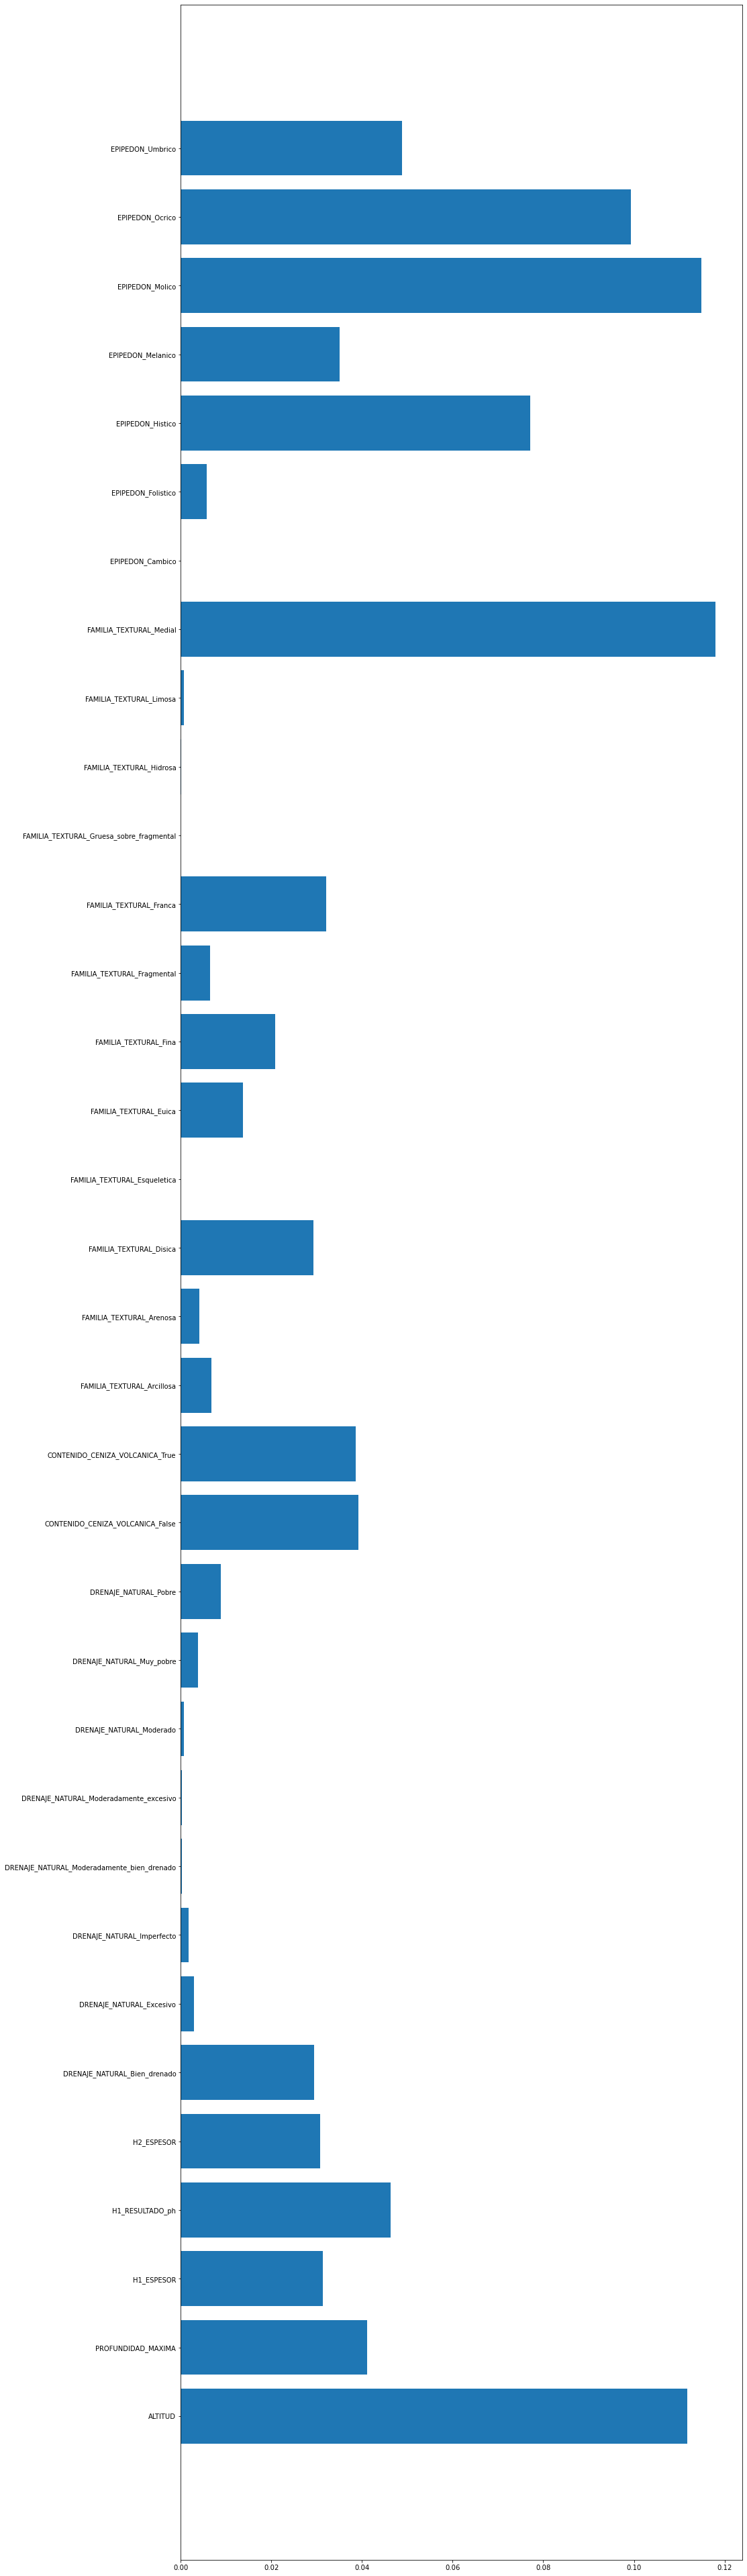

In [24]:
mejor_modelo.feature_importances_
plt.figure(figsize=(15,70))
plt.barh(X.columns, mejor_modelo.feature_importances_)
plt.show()

In [26]:
pred = mejor_modelo.predict(X = X_test)
#Matriz de confusión
#===================================================================================

mat_confusion = confusion_matrix(
                    y_true    = y_test,
                    y_pred    = pred
                )

accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = pred,
            normalize = True
           )

print("Matriz de confusión")
print("-------------------")
print(mat_confusion)
print("")
print(f"El accuracy de test es: {100 * accuracy} %")

Matriz de confusión
-------------------
[[879   1   0  15   0]
 [  0  63   0  76   1]
 [  0   0  27   0   0]
 [  1  19   0 993   8]
 [  0   1   0  22 150]]

El accuracy de test es: 93.61702127659575 %


In [28]:
print(classification_report(
        y_true = y_test,
        y_pred = pred
    ))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       895
           1       0.75      0.45      0.56       140
           2       1.00      1.00      1.00        27
           3       0.90      0.97      0.93      1021
           4       0.94      0.87      0.90       173

    accuracy                           0.94      2256
   macro avg       0.92      0.85      0.88      2256
weighted avg       0.93      0.94      0.93      2256



# Entrenamiento con pipelines

In [34]:
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.compose import make_column_selector


with open('Datos_finales.csv') as f:
    df = pd.read_csv(f, delimiter=',')

X=df.drop(columns=["CLIMA_AMBIENTAL","CODIGO","ORDEN","LATITUD","LONGITUD","PAISAJE","TIPO_RELIEVE","FORMA_TERRENO","MATERIAL_PARENTAL_LITOLOGIA"])

X=X[sorted(X.columns)]

le = preprocessing.LabelEncoder()
y=le.fit_transform(df.ORDEN)

#numeric_features=X.select_dtypes(exclude=['object', 'category','bool']).columns.to_list()
#categorical_features=X.select_dtypes(include=['object', 'category','bool']).columns.to_list()
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('categorical', categorical_transformer, make_column_selector(dtype_include=['object', 'category','bool'])),
        ('numeric',numeric_transformer,make_column_selector(dtype_exclude=['object', 'category','bool']))])


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 133)
weights= compute_class_weight('balanced',classes=np.unique(y_train),y=y_train)

weight_dict={}
for i,j in enumerate(np.unique(y_train)):
    weight_dict[j]=weights[i]
    
    
mejor_modelo = RandomForestClassifier(
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123,
                n_estimators = 150,
                class_weight = weight_dict,
                max_features = 'log2',
                max_depth = 31,
                criterion = 'entropy')
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', mejor_modelo)])


clf.fit(X_train,y_train)
print(clf.score(X_test,y_test))

0.936613475177305


In [35]:
import pickle as pk
with open("CATS_pipeline.pk","wb") as f:
    pk.dump(clf,f)
with open("CATS_label_encoder.pk","wb") as f:
    pk.dump(le,f)

In [41]:
new_df=df.loc[X_test.index].copy()
new_df=new_df.drop(columns=["ORDEN"])

In [42]:
with open("test_data.pk","wb") as f:
    pk.dump((new_df,y_test),f)

In [43]:
X_test.iloc[:100].to_dict(orient="records")

[{'ALTITUD': 463.0,
  'CONTENIDO_CENIZA_VOLCANICA': False,
  'DRENAJE_NATURAL': 'Excesivo',
  'EPIPEDON': 'Ocrico',
  'FAMILIA_TEXTURAL': 'Franca',
  'H1_ESPESOR': 30.0,
  'H1_RESULTADO_ph': 4.5,
  'H2_ESPESOR': 20.0,
  'PROFUNDIDAD_MAXIMA': 70.0},
 {'ALTITUD': 3553.0,
  'CONTENIDO_CENIZA_VOLCANICA': True,
  'DRENAJE_NATURAL': 'Bien_drenado',
  'EPIPEDON': 'Melanico',
  'FAMILIA_TEXTURAL': 'Hidrosa',
  'H1_ESPESOR': 53.0,
  'H1_RESULTADO_ph': 4.4,
  'H2_ESPESOR': 32.0,
  'PROFUNDIDAD_MAXIMA': 95.0},
 {'ALTITUD': 1364.0,
  'CONTENIDO_CENIZA_VOLCANICA': True,
  'DRENAJE_NATURAL': 'Bien_drenado',
  'EPIPEDON': 'Umbrico',
  'FAMILIA_TEXTURAL': 'Medial',
  'H1_ESPESOR': 34.0,
  'H1_RESULTADO_ph': 6.5,
  'H2_ESPESOR': 6.0,
  'PROFUNDIDAD_MAXIMA': 40.0},
 {'ALTITUD': 3420.0,
  'CONTENIDO_CENIZA_VOLCANICA': True,
  'DRENAJE_NATURAL': 'Bien_drenado',
  'EPIPEDON': 'Melanico',
  'FAMILIA_TEXTURAL': 'Medial',
  'H1_ESPESOR': 46.0,
  'H1_RESULTADO_ph': 5.0,
  'H2_ESPESOR': 4.0,
  'PROFUNDIDAD_MAXI